In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CV_PROVE/ComputerVision/code


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CV_PROVE/ComputerVision/code


In [ ]:
!pip install torch torchvision matplotlib numpy


In [ ]:
data_root = "/content/drive/MyDrive/data"


Batch n. 10/372 - Current batch loss: 2.1493
Batch n. 20/372 - Current batch loss: 1.5661
Batch n. 30/372 - Current batch loss: 1.3287
Batch n. 40/372 - Current batch loss: 1.1382
Batch n. 50/372 - Current batch loss: 0.9514
Batch n. 60/372 - Current batch loss: 0.9375
Batch n. 70/372 - Current batch loss: 0.8799
Batch n. 80/372 - Current batch loss: 0.8527
Batch n. 90/372 - Current batch loss: 0.7928
Batch n. 100/372 - Current batch loss: 0.8681
Batch n. 110/372 - Current batch loss: 0.6551
Batch n. 120/372 - Current batch loss: 0.6770
Batch n. 130/372 - Current batch loss: 0.7873
Batch n. 140/372 - Current batch loss: 0.7382
Batch n. 150/372 - Current batch loss: 0.6515
Batch n. 160/372 - Current batch loss: 0.6996
Batch n. 170/372 - Current batch loss: 0.5253
Batch n. 180/372 - Current batch loss: 0.6051
Batch n. 190/372 - Current batch loss: 0.6292
Batch n. 200/372 - Current batch loss: 0.6126
Batch n. 210/372 - Current batch loss: 0.5343
Batch n. 220/372 - Current batch loss: 0.50

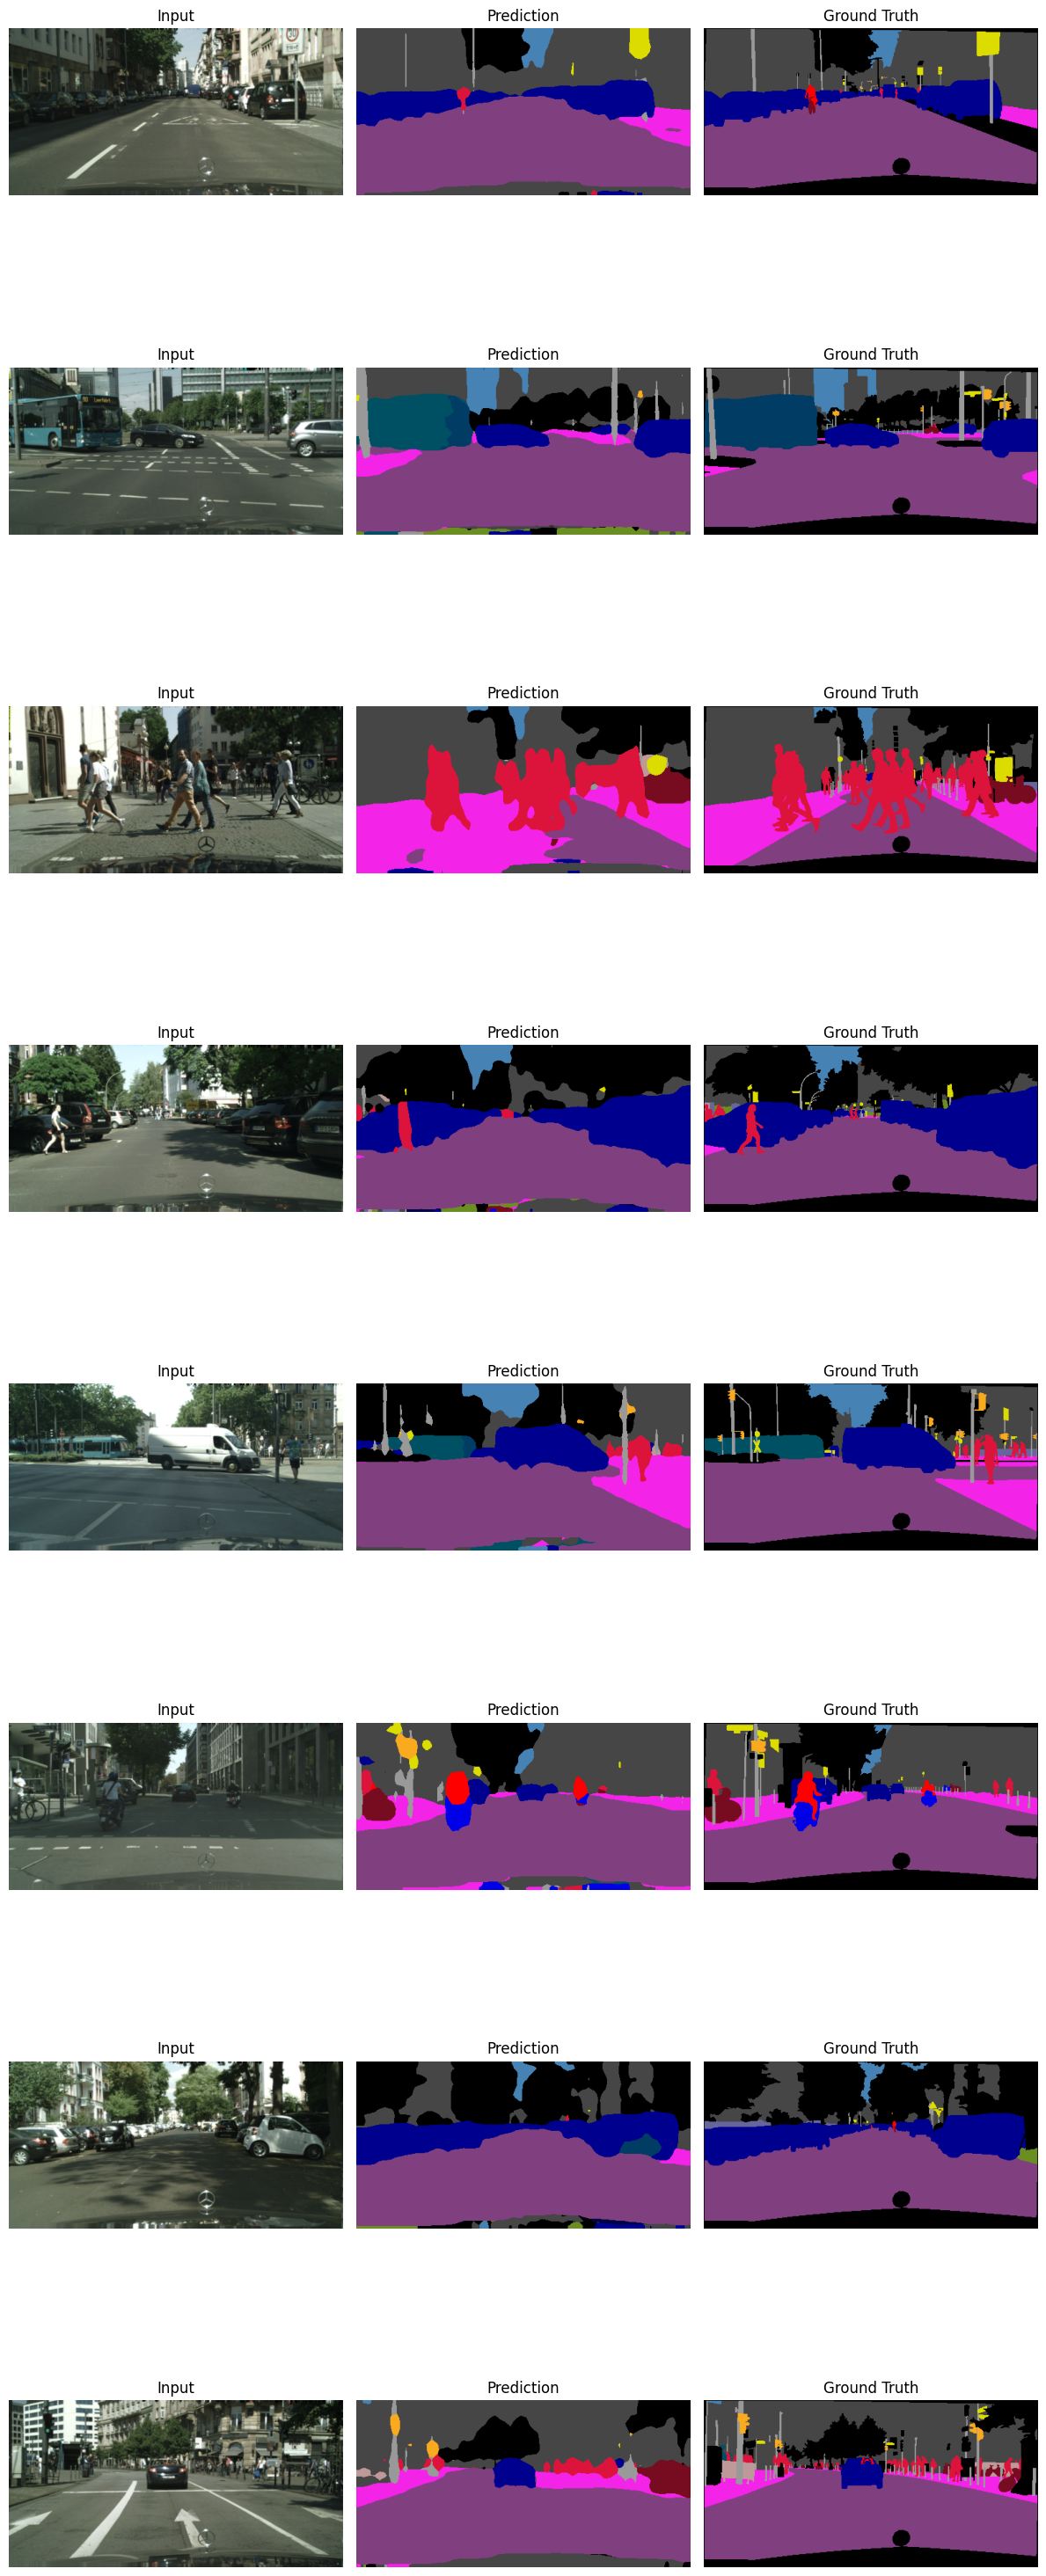

In [ ]:
# imposta il path al progetto
import os
os.chdir("/content/drive/MyDrive/CV_PROVE/ComputerVision/code")

# importa e configura come in main.py
import torch
from torchvision.datasets import Cityscapes
from torch.utils.data import DataLoader
from transforms.transforms import transform, target_transform
from models.DeepLabV3_ResNet50_model import model, optimizer, criterion, mymodel
from training.training import train_one_epoch
from evaluation.evaluation import evaluate

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_EPOCHS = 5

# crea i dataset e dataloader
train_ds = Cityscapes(data_root, "train", "fine", "semantic", target_transform=target_transform, transform=transform)
val_ds   = Cityscapes(data_root, "val",   "fine", "semantic", target_transform=target_transform, transform=transform)
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds,   batch_size=8, shuffle=False, num_workers=2)

# training
for epoch in range(NUM_EPOCHS):
    loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} loss={loss:.4f}")
torch.save(model.state_dict(), "RN50_epoch5.pth")

# evaluation
mymodel.load_state_dict(torch.load("RN50_epoch5.pth"))
evaluate(mymodel, val_loader, device)
